# <span style = "color:green"> Toxic Comments Classification </span>

***

The importance of maintaining civility on an online forum cannot be overstated. Cyber bullying is defined as “willful and repeated harm inflicted through the medium of electronic text.” It involves sending degrading, threatening, and/or sexually explicit messages and images to targets via web sites, blogs, instant messaging, chat rooms, e-mail, cell phones, web sites and personal online profiles. As a result, detecting and deleting poisonous communication from public forums is a vital duty that is impossible for human moderators to do.


Toxic comment categorization refers to the classification of several forms of toxic comments into one or more categories such as ‘toxic,’ ‘severe toxic,’ ‘obscene,’ ‘threat,’ ‘insult,’ and ‘identity hate.’ The topic is particularly intriguing because of the intense debates about how poisonous information on the internet has impacted society’s general health.

Find the dataset <a href = "https://www.kaggle.com/datasets/fizzbuzz/cleaned-toxic-comments">here</a>

***

### Import necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read 'test.csv' dataset

In [3]:
df= pd.read_csv('test.csv')

#### Shuffle the entire dataset to mix labels

In [4]:
df = df.sample(frac = 1)[0:1000]

In [5]:
df.reset_index(inplace = True)

In [6]:
df.head()

,index,comment_text,toxic
0,15545,"""\n\nI understand the trepidation in including...",0
1,10343,Vandalism Warning \n\n Please stop. If you con...,0
2,10378,REDIRECT Talk:Mitsubishi A6M Zero,0
3,11116,"""\n\nThere is no dispute about quasar redshift...",0
4,14296,Thanks for the list guidelines (which are not ...,0


### Check info of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         1000 non-null   int64 
 1   comment_text  1000 non-null   object
 2   toxic         1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


### Check basic statistical information about the dataset

In [8]:
df.describe()

,index,toxic
count,1000.000000,1000.000000
mean,9853.995000,0.514000
std,5754.413998,0.500054
min,12.000000,0.000000
25%,4860.000000,0.000000
50%,9688.000000,1.000000
75%,14626.750000,1.000000
max,19984.000000,1.000000


### Check for null values

In [9]:
df.isna().sum()

index           0
comment_text    0
toxic           0
dtype: int64

### Check for duplicates, Drop if any

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop_duplicates(keep = 'first', inplace = True)

### Plot a countplot of 'toxic'

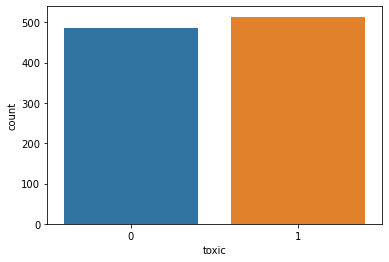

In [12]:
sns.countplot(x= df['toxic'])
plt.show()

### Create a function to with the following operations
* Remove all special characters from text
* Convert the text to lowercase
* Lemmatize all the words
* Remove any stopwords

In [13]:
def preprocess(sentence):
    text = re.sub(r"[^a-zA-Z0-9]",' ', sentence).split()
    
    text = [x.lower() for x in text if x not in stopwords.words('english')]
    
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(word,'v') for word in text]
    
    text = ' '.join(text)
    return text

### Apply the function on 'comment_text'

In [14]:
df['comment_text'] = df['comment_text'].apply(preprocess)

In [15]:
df.head()

,index,comment_text,toxic
0,15545,i understand trepidation include review compar...,0
1,10343,vandalism warn please stop if continue blank d...,0
2,10378,redirect talk mitsubishi a6m zero,0
3,11116,there dispute quasar redshifts wolf effect use...,0
4,14296,thank list guidelines write stone now try expl...,0


### Print a few of the texts after the preprocess

In [16]:
for i in range(10):
    print(df['comment_text'][i])
    print()

i understand trepidation include review compare amos bush newsom yet do highlight amos skills beauty album the reviewer also call album compel aside comparisons i actually please compare amos two renowned artists respect admire amos also decide read page hear ms amos music i think sort comparisons help give reader idea kind artist e type music produce amos

vandalism warn please stop if continue blank delete portion page content templates materials wikipedia plainwell mi may block edit you vandalize page blank entire section violate 3rr

redirect talk mitsubishi a6m zero

there dispute quasar redshifts wolf effect use suggest quasars might cosmological distance unless scienceapologist source verify statement what researchers wolf effect say last quote article note possibility correlation induce spectral shift may contribute shift observe spectra astronomical object quasars jam also write result demonstrate plausibility existence extra galactic object discordant redshifts due well estab

### Split the dataset into Input (X) & Target (y) variables

In [17]:
X = df['comment_text']
y = df['toxic']

### Split the dataset into Training and Testing set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

### Convert all texts into vectors & Also add padding

In [19]:
tokenizer = Tokenizer(num_words=5000)

In [20]:
tokenizer.fit_on_texts(X)

In [21]:
vocab_size = len(tokenizer.word_index) + 1

In [22]:
def text_encoding(txt):
    encoded_text = tokenizer.texts_to_sequences(txt)
    
    padded_sequence = pad_sequences(encoded_text,maxlen=120)
    
    return padded_sequence

In [23]:
X_train = text_encoding(X_train)

In [24]:
X_test = text_encoding(X_test)

### Create Keras Sequential Model. Add the following Layers
* Embedding Layer
* Bidirectional Layer with LSTM
* GRU Layer
* 1 Hidden layer
* 1 Dropout Layer

In [25]:
model = Sequential()

model.add(layers.Embedding(vocab_size, 128))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.GRU(128))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation = 'sigmoid'))

### Compile the model

In [86]:
model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

### Train the model.
* Set epochs as 10
* Add validation split

In [87]:
model.fit(X_train, y_train, epochs = 10, validation_split= 0.1)

Epoch 1/10
23/23 [==============================] - 10s 256ms/step - loss: 0.6686 - accuracy: 0.5861 - val_loss: 0.5932 - val_accuracy: 0.7125
Epoch 2/10
23/23 [==============================] - 5s 215ms/step - loss: 0.2438 - accuracy: 0.9125 - val_loss: 0.4094 - val_accuracy: 0.8250
Epoch 3/10
23/23 [==============================] - 5s 214ms/step - loss: 0.0565 - accuracy: 0.9875 - val_loss: 0.4361 - val_accuracy: 0.8500
Epoch 4/10
23/23 [==============================] - 5s 211ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0.4433 - val_accuracy: 0.8500
Epoch 5/10
23/23 [==============================] - 5s 213ms/step - loss: 0.0075 - accuracy: 0.9972 - val_loss: 0.6569 - val_accuracy: 0.8375
Epoch 6/10
23/23 [==============================] - 5s 215ms/step - loss: 0.0117 - accuracy: 0.9986 - val_loss: 0.4711 - val_accuracy: 0.8500
Epoch 7/10
23/23 [==============================] - 5s 222ms/step - loss: 0.0065 - accuracy: 0.9986 - val_loss: 0.5091 - val_accuracy: 0.8625
Epoch

### Evaluate the model

In [88]:
model.evaluate(X_train, y_train)

25/25 [==============================] - 3s 63ms/step - loss: 0.0453 - accuracy: 0.9850


[0.04530995711684227, 0.9850000143051147]

### Make predictions with X_test

In [90]:
y_pred = model.predict(X_test)

In [98]:
y_pred = [1 if x > 0.5 else 0 for x in y_pred]

In [100]:
y_pred

[1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0]

### Check accuracy of our prediction

In [103]:
accuracy_score(y_test, y_pred)

0.795

### Plot confusion matrix on heatmap

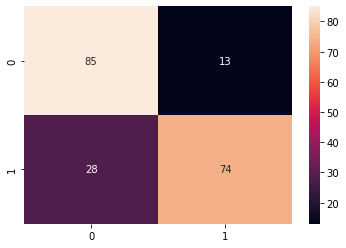

In [107]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

### Print classification report

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81        98
           1       0.85      0.73      0.78       102

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



***